In [9]:
pip install numpy matplotlib scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 6.9 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 4.2 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 8.8 MB/s eta 0:00:0000:0100:01m
Note: you may need to restart the kernel to use updated packages.


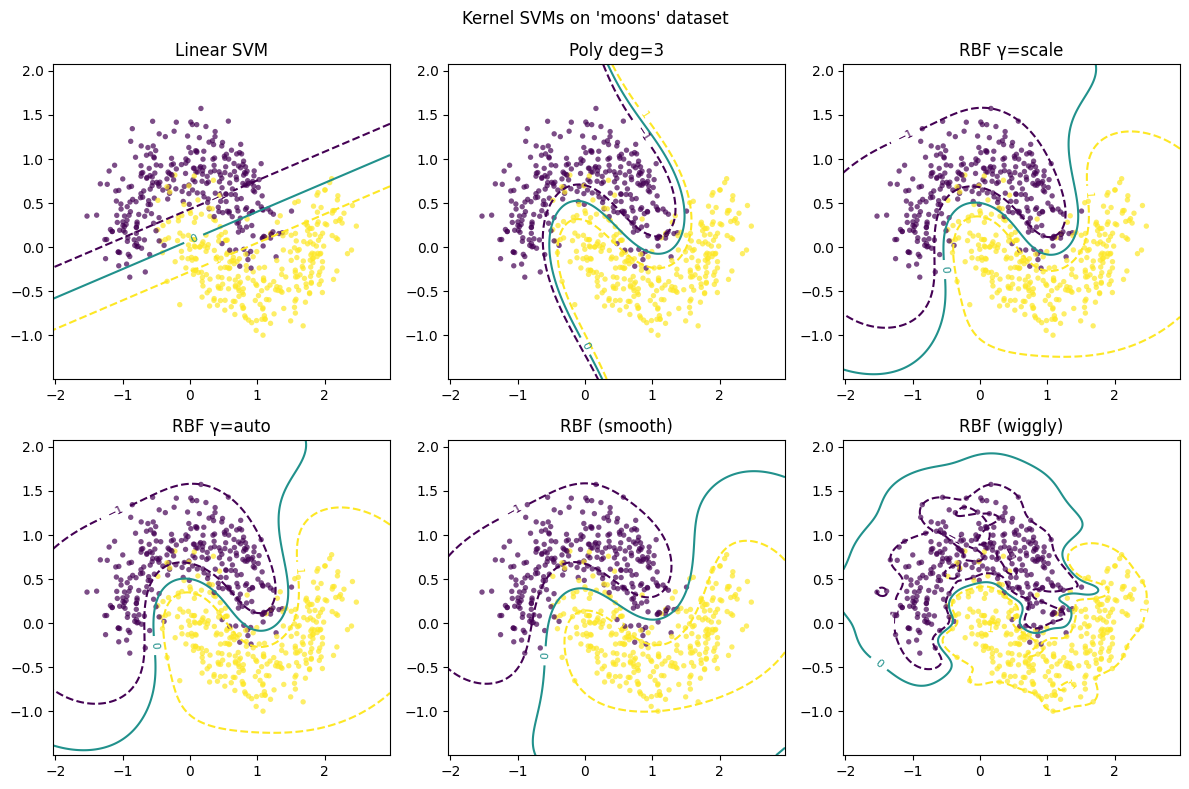

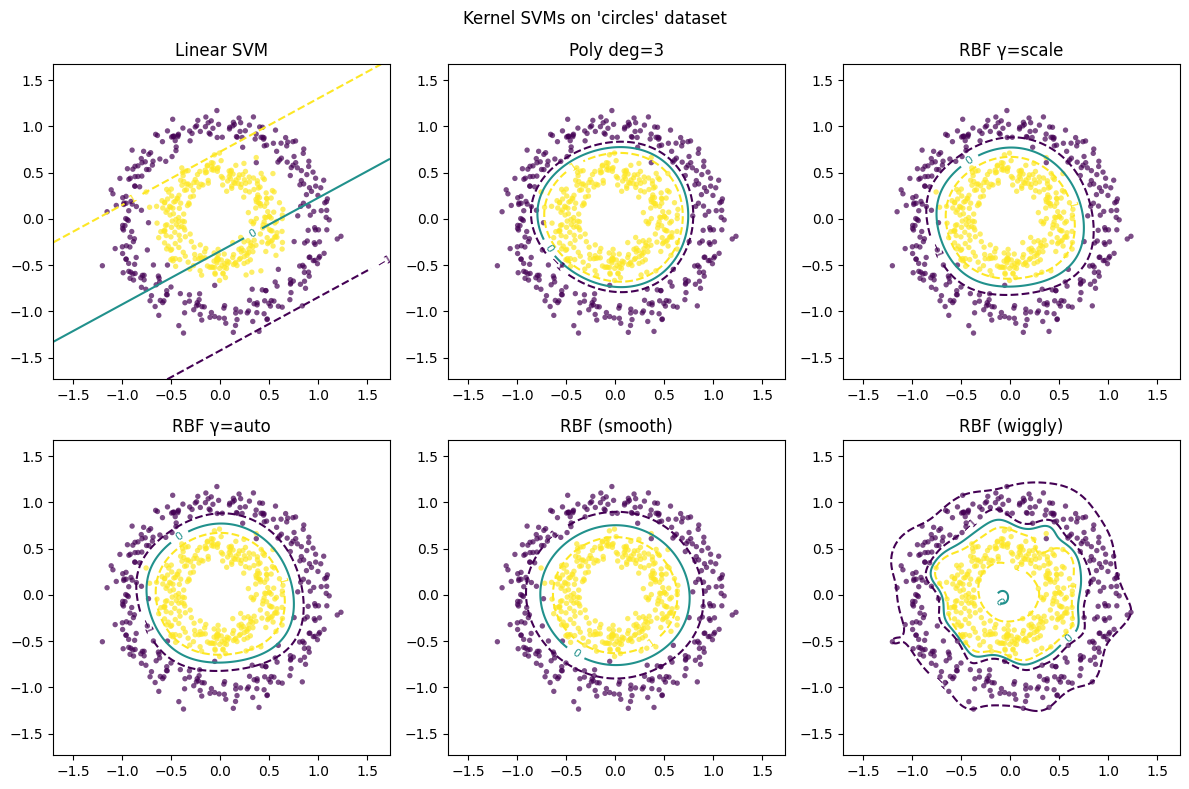

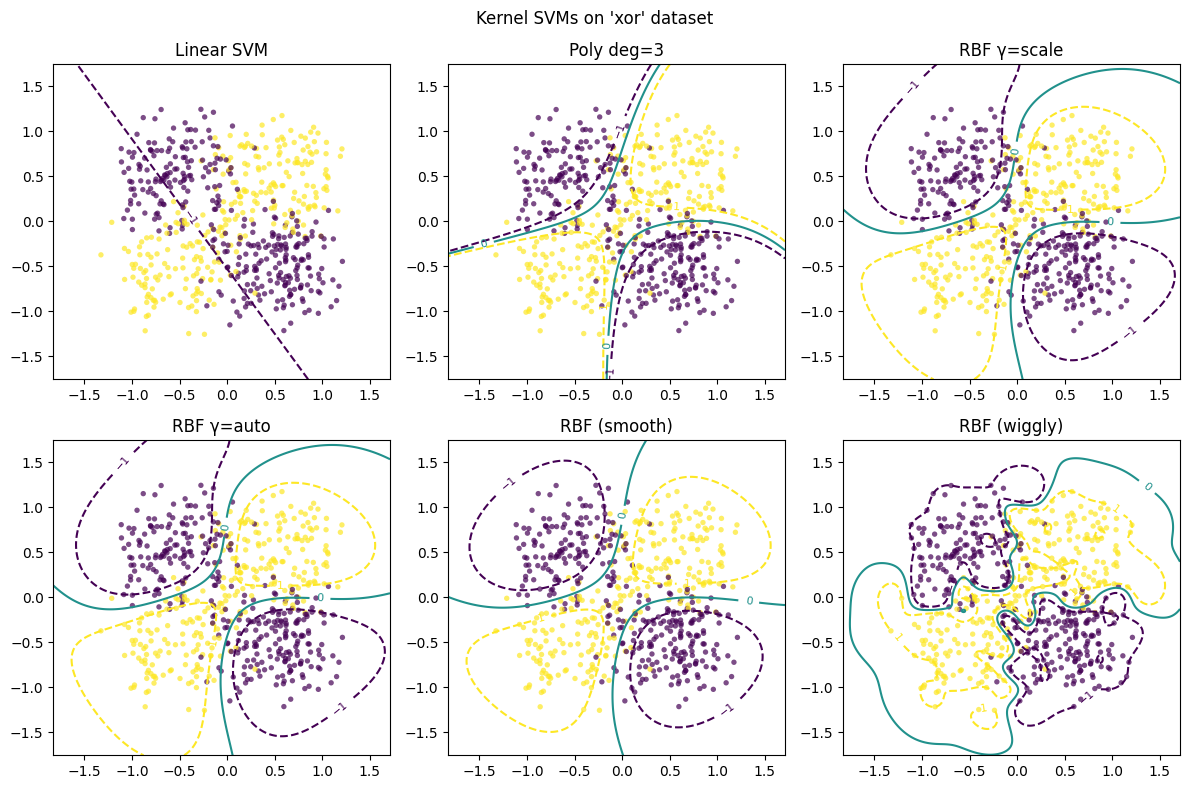

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from datasets_generation import load_dataset

def plot_decision_function(ax, model, X, y, title):
    # mesh
    x_min, x_max = X[:,0].min()-0.5, X[:,0].max()+0.5
    y_min, y_max = X[:,1].min()-0.5, X[:,1].max()+0.5
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # decision boundary & margins
    cs = ax.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=["--", "-", "--"])
    ax.clabel(cs, inline=1, fontsize=8)
    # points
    ax.scatter(X[:,0], X[:,1], c=y, s=15, alpha=0.7, edgecolor="none")
    ax.set_title(title)

# Models to compare
models = [
    ("Linear SVM", make_pipeline(StandardScaler(), SVC(kernel="linear", C=1.0))),
    ("Poly deg=3", make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, C=5.0, coef0=1.0, gamma="scale"))),
    ("RBF γ=scale", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=5.0, gamma="scale"))),
    ("RBF γ=auto",  make_pipeline(StandardScaler(), SVC(kernel="rbf", C=5.0, gamma="auto"))),
    ("RBF (smooth)", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=1.0, gamma=0.5))),
    ("RBF (wiggly)", make_pipeline(StandardScaler(), SVC(kernel="rbf", C=50.0, gamma=5.0))),
]

N = 600

rng = np.random.default_rng(0)

for DATASET in ["moons", "circles", "xor", "spirals", "rings", "checker"]:
    X, y = load_dataset(DATASET, N, rng)
    # your code that uses X, y here

    fig, axes = plt.subplots(2, 3, figsize=(12, 8))
    axes = axes.ravel()

    for ax, (name, clf) in zip(axes, models):
        clf.fit(X, y)
        plot_decision_function(ax, clf, X, y, name)

    plt.suptitle(f"Kernel SVMs on '{DATASET}' dataset")
    plt.tight_layout()
    plt.show()
